In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1
679,2.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1
680,5.0,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3
681,1.0,1.0,NaN,3.0,NaN,1.0,NaN,NaN,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	32
float64		column 2	64
float64		column 3	82
float64		column 4	66
float64		column 5	82
float64		column 6	64
float64		column 7	146
float64		column 8	48
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,651.000000,619.000000,601.000000,617.000000,601.000000,619.000000,537.000000,635.000000,683.000000
mean,4.405530,3.095315,3.076539,2.766613,3.139767,3.484653,3.245810,2.765354,1.603221
std,2.793107,3.024008,2.889775,2.789240,2.116703,3.609275,2.294361,2.976257,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

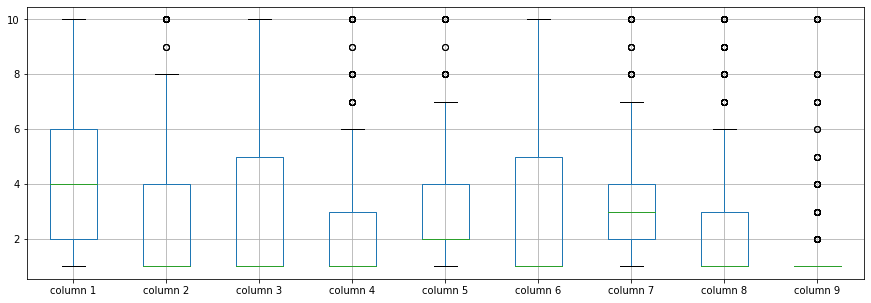

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.405530
column 2    3.095315
column 3    3.076539
column 4    2.766613
column 5    3.139767
column 6    3.484653
column 7    3.245810
column 8    2.765354
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.633518,0.638156,0.454992,0.478161,0.585747,0.510089,0.515690,0.339400
column 2,0.633518,1.000000,0.902951,0.664919,0.748396,0.686353,0.713250,0.705683,0.425505
column 3,0.638156,0.902951,1.000000,0.651070,0.702653,0.704531,0.700324,0.692579,0.405019
column 4,0.454992,0.664919,0.651070,1.000000,0.553235,0.654205,0.631632,0.547588,0.348651
column 5,0.478161,0.748396,0.702653,0.553235,1.000000,0.603432,0.617175,0.625095,0.446058
column 6,0.585747,0.686353,0.704531,0.654205,0.603432,1.000000,0.655327,0.566226,0.303530
column 7,0.510089,0.713250,0.700324,0.631632,0.617175,0.655327,1.000000,0.631121,0.257741
column 8,0.515690,0.705683,0.692579,0.547588,0.625095,0.566226,0.631121,1.000000,0.411604
column 9,0.339400,0.425505,0.405019,0.348651,0.446058,0.303530,0.257741,0.411604,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+99,9+99+99,9+99+99,9+99+99+99+99,9+99+99+99,9+99+99,9+99,9], vae_layer = False, seed = 990)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 32.1349823815482
Epoch: 1 , loss: 32.33541688464937
Epoch: 2 , loss: 32.13183661869594
Epoch: 3 , loss: 30.536915688287642
Epoch: 4 , loss: 28.75354966663179
Epoch: 5 , loss: 27.619762897491455
Epoch: 6 , loss: 26.983472687857493
Epoch: 7 , loss: 26.708984942663285
Epoch: 8 , loss: 26.42875898452032
Epoch: 9 , loss: 26.0114658446539
Epoch: 10 , loss: 25.855632827395485
Epoch: 11 , loss: 25.93573944909232
Epoch: 12 , loss: 25.345204852876208
Epoch: 13 , loss: 25.07282020932152
Epoch: 14 , loss: 24.705999942052934
Epoch: 15 , loss: 25.11347162155878
Epoch: 16 , loss: 25.763831274850027
Epoch: 17 , loss: 25.24614343189058
Epoch: 18 , loss: 25.00096103123256
Epoch: 19 , loss: 25.405662718273344
Epoch: 20 , loss: 24.585320177532378
Epoch: 21 , loss: 23.787705603100004
Epoch: 22 , loss: 24.037626516251336
Epoch: 23 , loss: 23.9587657338097
Epoch: 24 , loss: 23.605592591421946
Epoch: 25 , loss: 23.843624024164

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...
678,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
679,0.0,0.225079,0.000000,0.0,-0.671868,0.267871,-1.703204,0.000000,0
680,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
681,0.0,0.000000,1.725394,0.0,0.583041,0.000000,1.642847,1.480642,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(99.05652987793465, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.29540173070275794

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.000000,1.000000,1.0,2.000000,1.000000,3.000000,1.000000,1
1,5.0,4.000000,4.000000,5.0,7.000000,10.000000,3.000000,2.000000,1
2,3.0,1.000000,1.000000,1.0,2.000000,2.000000,3.000000,1.000000,1
3,6.0,8.000000,8.000000,1.0,3.000000,4.000000,3.000000,7.000000,1
4,4.0,1.000000,1.000000,3.0,2.000000,1.000000,3.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...
678,3.0,1.000000,1.000000,1.0,2.000000,1.000000,2.000000,1.000000,1
679,2.0,1.225079,1.000000,1.0,1.328132,1.267871,1.296796,1.000000,1
680,5.0,10.000000,10.000000,10.0,4.000000,10.000000,5.000000,6.000000,3
681,1.0,1.000000,2.725394,3.0,2.583041,1.000000,2.642847,2.480642,1


In [20]:
imputations[-1].to_excel("BCW_AG_10(imp).xlsx", index=False, header=False)